#1. İlk olarak her zamanki gibi K-means Clustering’i gerçekleştirmek için gereken kütüphaneleri import edeceğiz.

    Numpy: Çok boyutlu dizilerle başa çıkmamıza yardımcı olan üçüncü taraf bir pakettir.
    Pandas: Verileri tablo şeklinde düzenlememize izin verir.
    Matplotlib: Numpy hesaplamasını görselleştirmeye yardımcı olur.
    Seaborn: Bu aynı zamanda Matplotlib’in görselleştirilmesine de katkıda bulunur.
    Scikit-learn: Bu, en yaygın kullanılan makine öğrenme kütüphanesidir.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

2.Bu adımda pandas veri çerçevesini kullanarak değişken veri setine veri yükleyeceğiz.Müşteri memnuniyeti ve bağlılığını içeren 30 gözlem vardır. Buradaki veriler .csv formatındadır.

In [ ]:
data=pd.read_csv('segmentasyon.csv')
data

,Memnuniyet,Bağlılık
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


3.Şimdi plot komutu ile verilen verinin dağılım grafiğini çizeceğiz.

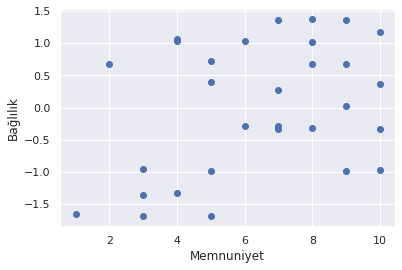

In [ ]:
plt.scatter(data['Memnuniyet'],data['Bağlılık'])
plt.xlabel('Memnuniyet')
plt.ylabel('Bağlılık')
plt.show
x=data.copy()

4.Bu adımda ise kümeleme modelimizi oluşturuyoruz. Öncelikle sadece verilerimizin bir kopyasını oluşturuyoruz ve onu x değişkeninde saklıyoruz.
Şimdi değişken k-means yaratacağız ve K-Means argümanı 2 olsun dedik.Yani 2 küme oluşturmak istediğimizi söyledik. Bu basit kod satırını k-means algoritmasını uygulayacak ve verilerimizi iki kümeye ayıracaktır.
Aşağıdaki açıklamaya bakarsak arka planda 300 adet iterasyon gerçekleştiğini görebilirsiniz.

In [ ]:
kmeans=KMeans(2) # k=2 olsun dedik
kmeans.fit(x) # Modelimizi oluşturduk


KMeans(n_clusters=2)

5.Tekrar x’in bir kopyasını oluşturacağız ve kümelerde saklayacağız. K-means algoritmamızın predict ettiği yani tahmin ettiği değere sahip olan cluster_predict adlı yeni bir sütun oluşturacağız. Daha sonra kümelenmiş verileri çizeceğiz, burada “Memnuniyet” ve “Bağlılık” olmak üzere iki parametremiz olduğunu unutmayın. İki kümeyi, biri kırmızı, diğeri mor olmak üzere ayıralım.

In [ ]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x) #Bir önceki satırda modelimizi oluşturmuştuk,bu satırda ise x datasına göre
                                              #modelimizi tanımlıyoruz

<function matplotlib.pyplot.show(*args, **kw)>

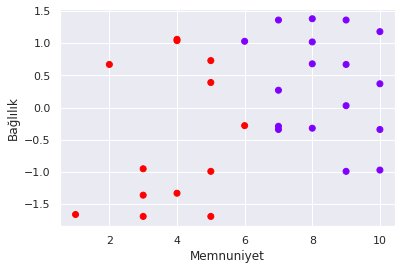

In [ ]:
plt.scatter(clusters['Memnuniyet'],clusters['Bağlılık'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Memnuniyet')
plt.ylabel('Bağlılık')
plt.show

6. Şimdi standartlaştırma yapmamız gerekiyor. Standartlaştırma , bizim daha sağlıklı ve doğru işlemler yapmamızı sağlar. Datamızda gördüğünüz üzere “Memnuniyet” değerleri “Bağlılık” değerlerinden çok daha büyüktür. Bu bizim algoritmamızın “Bağlılık” değerlerini görmezden gelmesine sebep olabilir,bu yüzden “Memnuniyet” değerlerini “Bağlılık” seviyesine indirmemiz gerekiyor.

In [ ]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.33256994],
       [-0.15523011, -0.28159465],
       [-0.54330537, -0.99225413],
       [ 0.23284516, -0.29160394],
       [-0.93138063,  1.05965001],
       [-2.09560642, -1.66287646],
       [ 1.39707095, -0.97223555],
       [ 0.62092042, -0.3216318 ],
       [ 0.62092042,  1.01961285],
       [ 0.62092042,  0.67929704],
       [ 1.39707095, -0.34165038],
       [-0.54330537,  0.38902768],
       [-0.54330537, -1.69290433],
       [-1.70753116,  0.66928776],
       [ 0.23284516,  0.26891622],
       [ 1.00899568,  1.35992866],
       [ 0.62092042,  1.37994724],
       [ 0.23284516,  1.35992866],
       [ 0.23284516, -0.34165038],
       [ 1.00899568,  0.66928776],
       [ 1.39707095,  1.17976147],
       [-1.31945589, -1.69290433],
       [-0.93138063,  1.03963143],
       [-1.31945589, -0.95221698],
       [-0.15523011,  1.02962214],
       [ 1.00899568, -0.99225413],
       [ 1.39707095,  0.3690091 ],
       [ 1.00899568,  0.02869329],
       [-1.31945589,

Veriler sıfır ortalama civarında ölçeklenir. Şimdi her iki verinin de eşit şekilde ölçeklendiğini ve şimdi ikisinin de özellik olarak seçilme şansının eşit olacağını görebiliyoruz.

7.Dirsek Yöntemi

Neden sadece 2 küme ile k-means başlattığımızı hiç merak ettiniz mi?
Herhangi bir sayıda kümeye sahip olabilmeyi isteyip herhangi bir değerle başlatabilirdik. Ancak çok sayıda küme olduğu zaman analizler zorlaşmaktadır. Öyleyse, başlatılacak küme sayısını tam olarak nasıl bileceğiz? Elinizdeki problemlere göre K değeri değişeceği için kesin bir rakam söylenemez. Farklı problemlerde farklı değerler çıkacaktır.

In [ ]:
wcss=[] #liste oluşturduk.

for i in range(1,30): #30 adet örneklememiz olduğu için 1'den 30'a kadar gitmesini sağlıyoruz.
    kmeans=KMeans(i)
    kmeans.fit(x_scaled) #standartlaştırdığımız datamıza göre fit et,yani modelimizi oluştur
    wcss.append(kmeans.inertia_) #inertia ne demek? Her bir k değeri için wcss değerini bul.
wcss    

[60.0,
 29.83268721751252,
 17.92843538713845,
 10.25787858046441,
 7.803348822139462,
 6.559605135058634,
 5.449810776501739,
 4.398493849207178,
 3.869686811450241,
 3.3327594485437166,
 2.886198520595478,
 2.525828242237737,
 2.06156060202456,
 1.861258767746626,
 1.631386376219278,
 1.3599989308322824,
 1.114478168025813,
 1.0591594814586816,
 0.7778363910485727,
 0.7470953715200361,
 0.5460834381355173,
 0.42404168683661425,
 0.3457143639929876,
 0.2473203193900408,
 0.17181874285897478,
 0.11391131815198502,
 0.05600389344499529,
 0.0014526949104694674,
 0.00020037171178889244]

Şimdi de görselleştirelim..

<function matplotlib.pyplot.show(*args, **kw)>

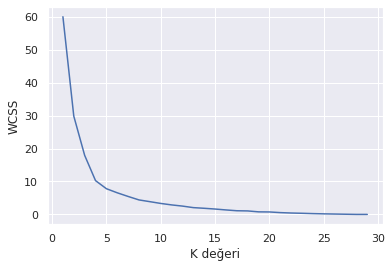

In [ ]:
plt.plot(range(1,30),wcss)
plt.xlabel('K değeri')
plt.ylabel('WCSS')
plt.show

Burada dirsek yöntemi, kümelere nasıl ihtiyaç duyacağımız konusunda kafamız karıştığında kullanışlı olur. Grafiğimiz dirseğe benziyor ve bu dirsek noktasını belirlemek zorundayız.
Burada dirsek noktası 4 civarındadır ve bu, seçmemiz gereken yukarıdaki veriler için optimal küme sayımızdır.
Küme sayısını arttırmaya devam ettiğimizde 4'ten sonra dikkatle bakarsak wcss’lerde büyük bir değişiklik olmaz ve sabit kalır.

8.Sorunumuz için optimal sayıda kümeye sahibiz.
Şimdi 4 sayıdaki yeni kümelenmelerle birlikte kümelemeleri hızla gerçekleştireceğiz ve daha sonra bazı analizlere geçeceğiz.

In [ ]:
kmeans_new=KMeans(5)
kmeans.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)
cluster_new

,Memnuniyet,Bağlılık,cluster_pred
0,4,-1.33,1
1,6,-0.28,4
2,5,-0.99,1
3,7,-0.29,4
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,4
8,8,1.02,3
9,8,0.68,3


Bu, 4 kümeyle kümelemeyi gerçekleştiren basit bir koddur. Burada dört küme vardır, bu yüzden tüm verilerimiz 0,1,2 veya 3 olarak sınıflandırılır.

9.Yeni kümelerin çizilmesi

<function matplotlib.pyplot.show(*args, **kw)>

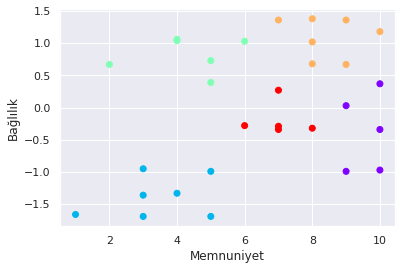

In [ ]:
plt.scatter(cluster_new['Memnuniyet'],cluster_new['Bağlılık'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Memnuniyet')
plt.ylabel('Bağlılık')
plt.show

10.Analiz

    Mavi noktalar, daha az memnun ve daha az bağlı olan ve bu nedenle yabancılaşmış olarak adlandırılabilecek insanlardır.
    Kırmızı noktalar, bağlılığı yüksek ve memnuniyeti az olan insanlardır.
    Mor noktalar yüksek bağlılık ve memnuniyeti olan insanlardır.
    Açık yeşil noktalar, yüksek memnuniyet fakat orta derece bağlılıkta olan insanlardır.

Bir kurumun amacı daha fazla insanı mor nokta seviyesine getirmektir. Özellikle mavi noktalardaki insanların şikayetlerini analiz ve tespit edip düzeltebilirler. Böylece müşteri memnuniyeti ve bağlılığı artmış olur.